In [1]:
import os
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import numpy as np
from math import hypot
%matplotlib inline

In [3]:
def show_imgs(test_input, test_output):
    for i, f in enumerate(os.listdir(test_input)):
        
        img = Image.open(test_input / f)
        pred = Image.open(test_output / f)

        plt.figure(figsize=(15, 4))
        print(f)
        plt.subplot(131)
        plt.imshow(img)
        plt.title('input image')

        plt.subplot(132)
        plt.imshow(pred)
        plt.title('predicted layout')

        plt.subplot(133)
        img = cv2.imread(str(test_output / f))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        edges = cv2.Canny(img, 100, 200)
        plt.imshow(edges)
        plt.title('predicted layout edges')
        '''
        plt.subplot(133)
        img = cv2.imread(str(test_output / f))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contours = cv2.findContours(img, 1, 2)
        plt.imshow(contuors)
        plt.title('predicted layout contours')
        '''
        
        plt.show()

sun_akisxngflhhhphyu.jpg


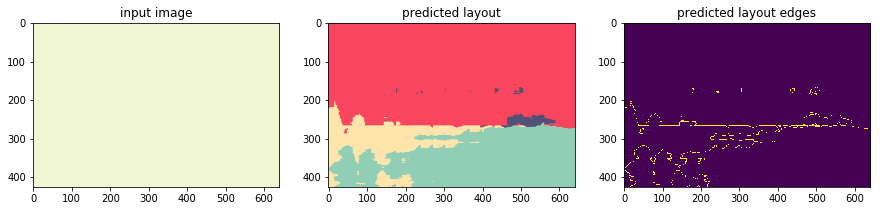

sun_bqdftbxjjcqvmahr.jpg


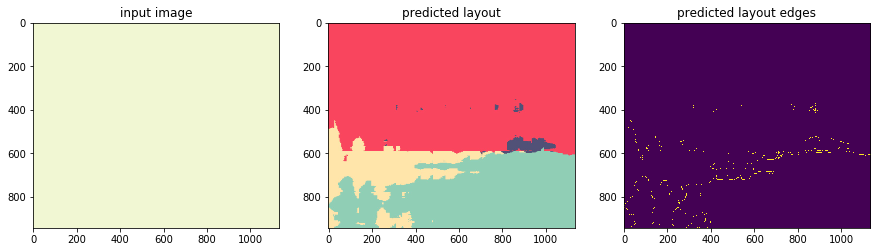

sun_bxydjaqdyvspbvkt.jpg


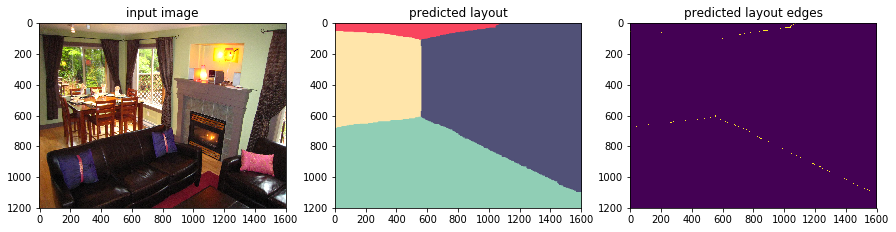

sun_bzybufberuuzchjl.jpg


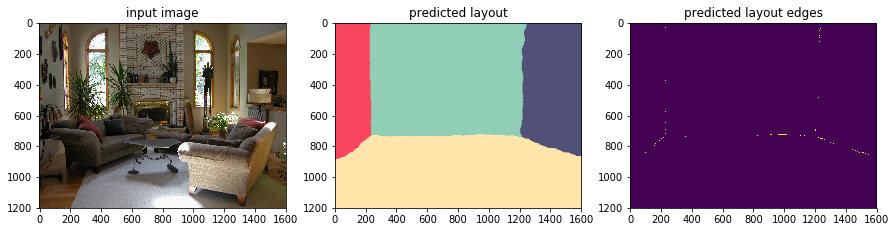

In [12]:
# lsun
test_input = Path('../data/test_input')
test_output = Path('../data/test_output')
show_imgs(test_input, test_output)

169.jpg


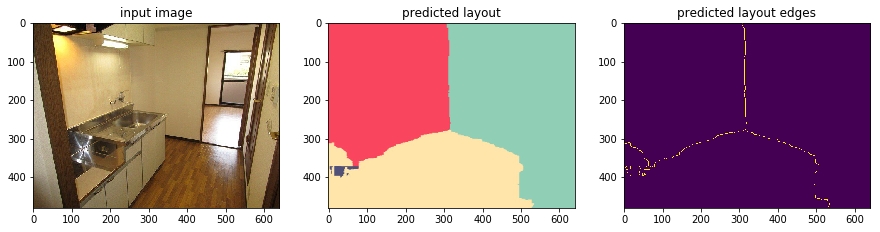

148.jpg


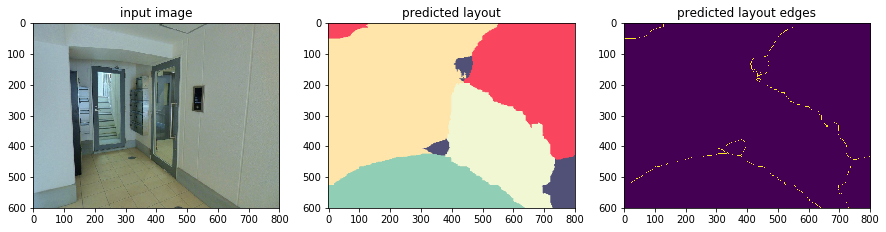

1.jpg


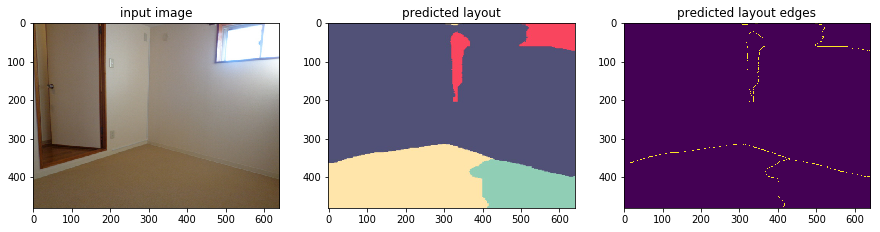

125.jpg


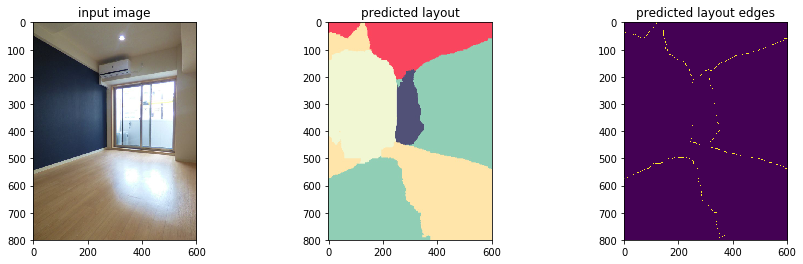

107.jpg


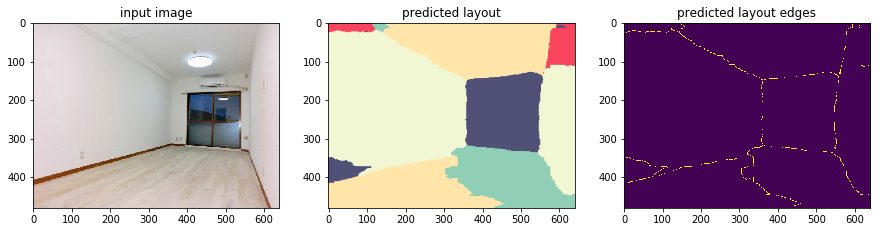

171.jpg


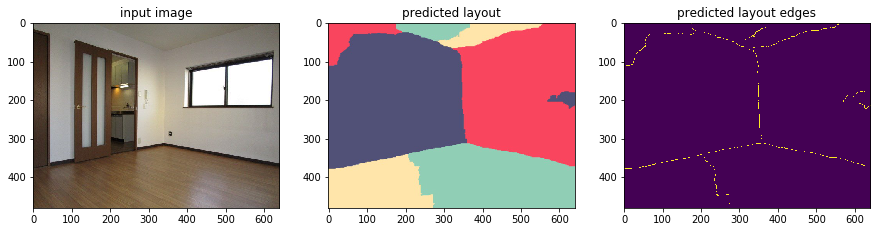

115.jpg


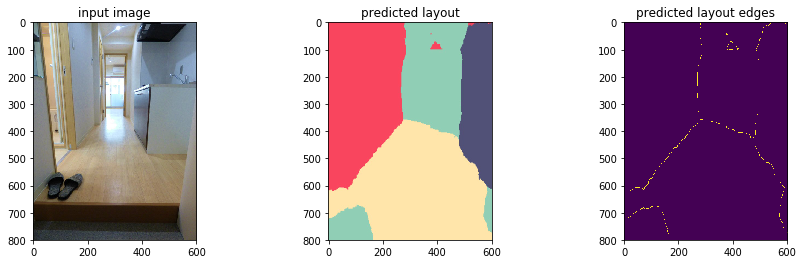

229.jpg


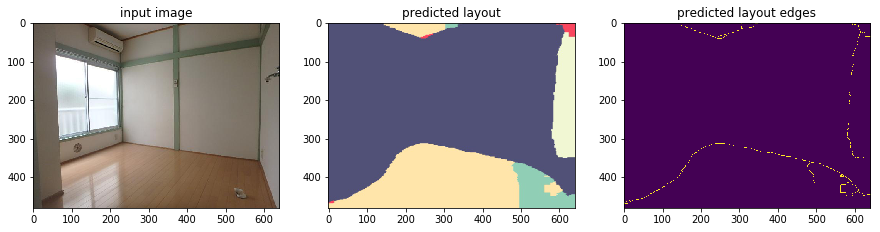

247.jpg


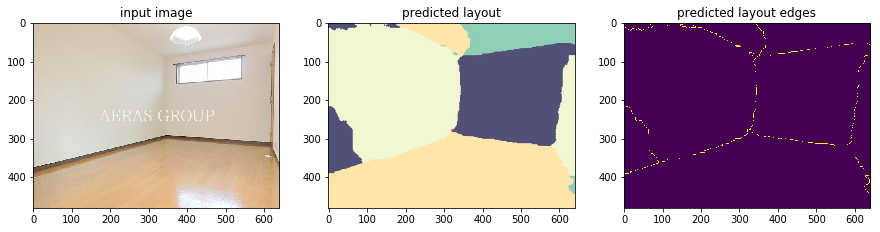

232.jpg


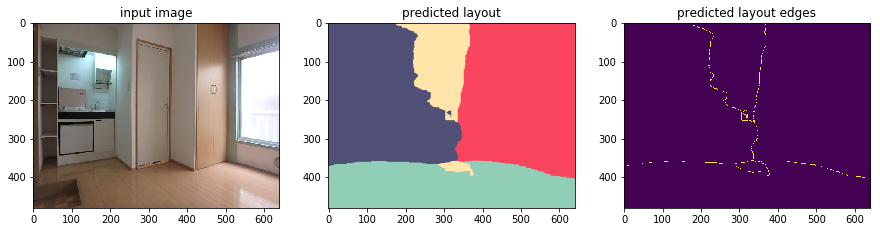

284.jpg


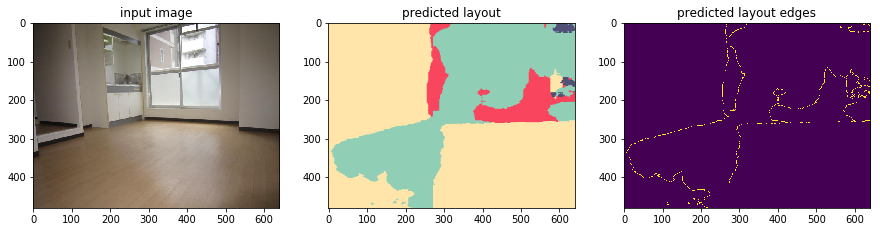

117.jpg


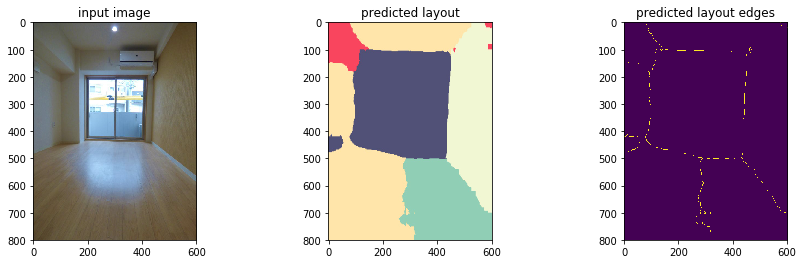

170.jpg


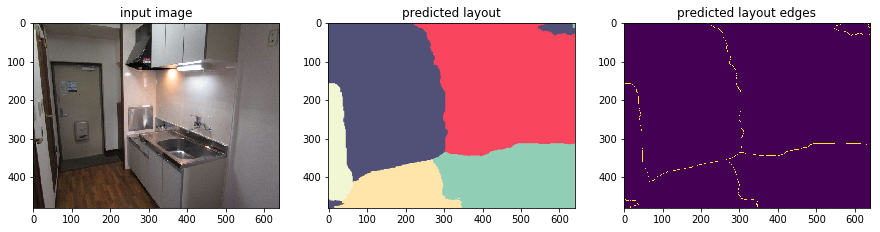

293.jpg


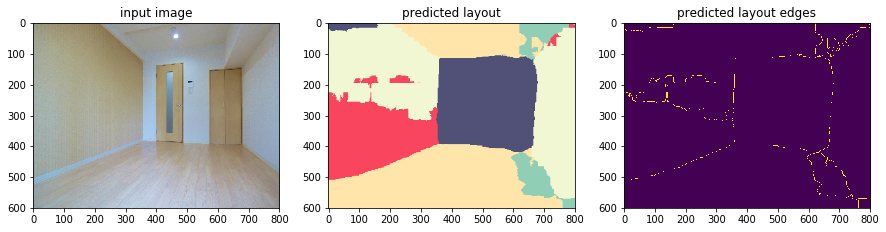

248.jpg


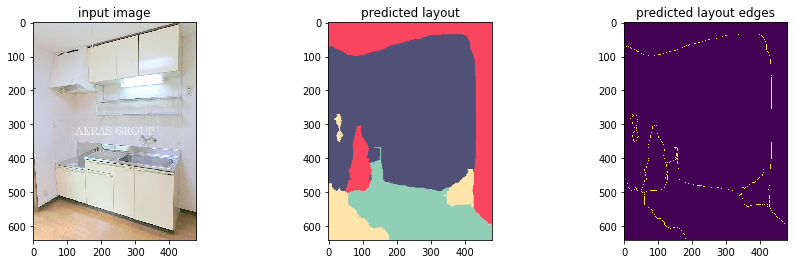

163.jpg


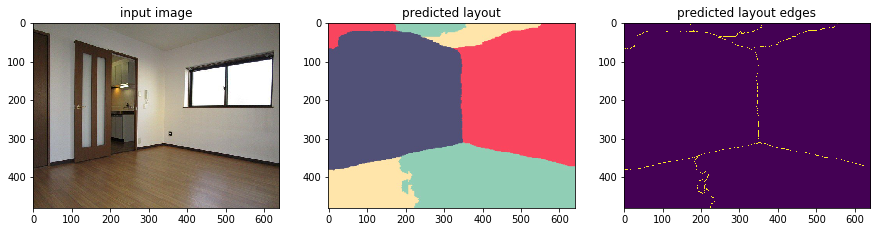

123.jpg


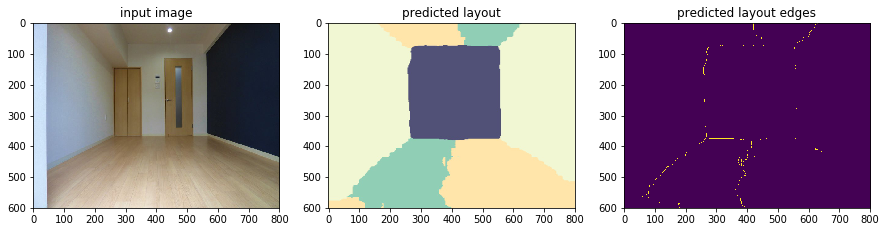

28.jpg


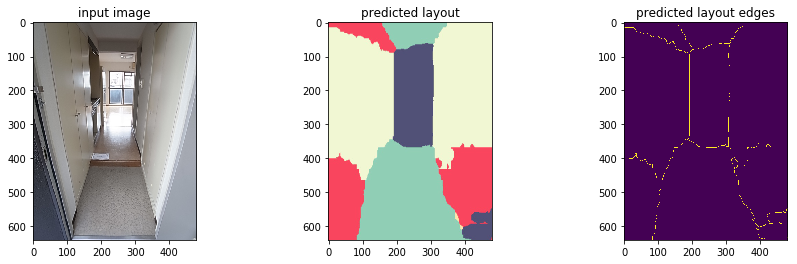

30.jpg


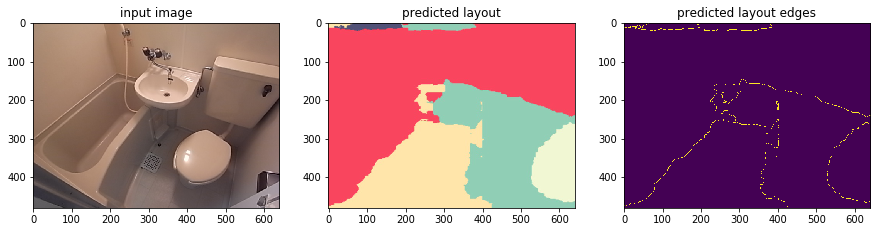

350.jpg


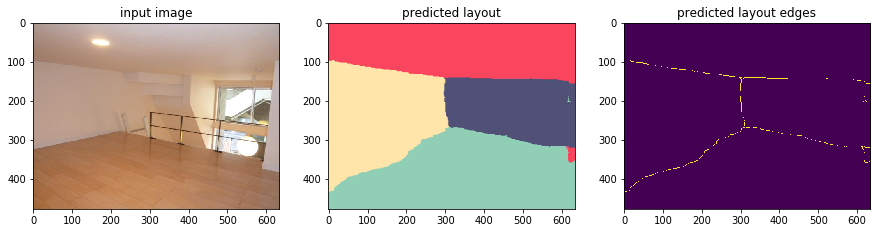

29.jpg


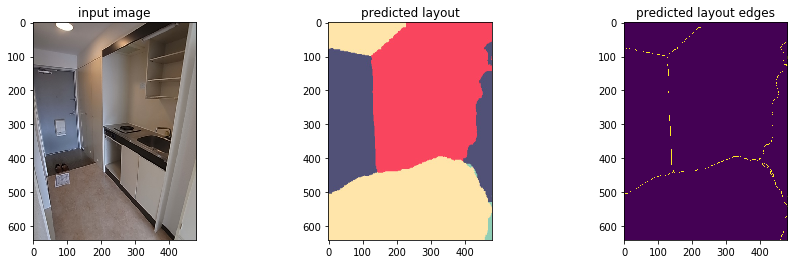

357.jpg


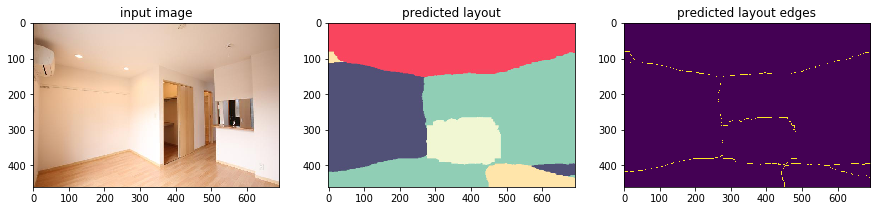

250.jpg


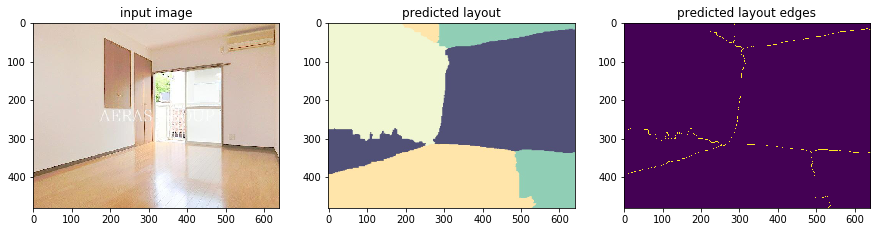

39.jpg


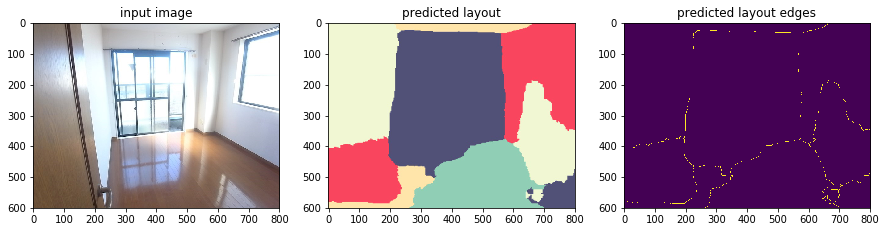

31.jpg


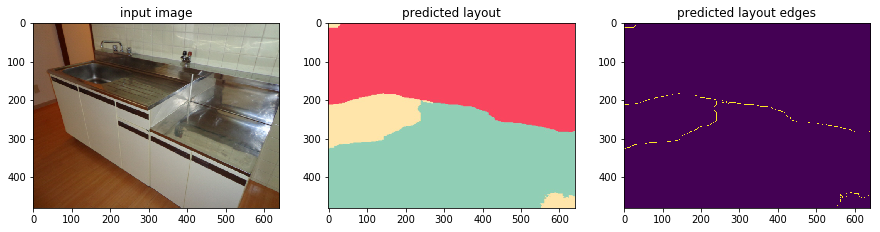

118.jpg


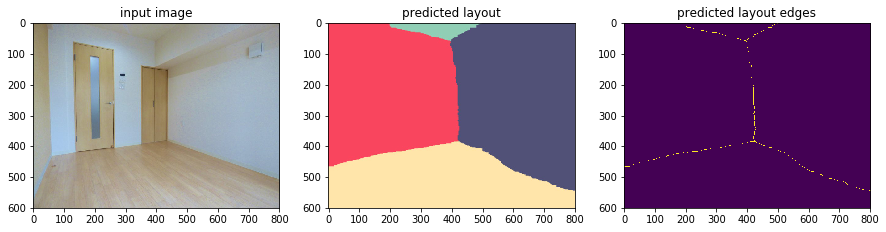

40.jpg


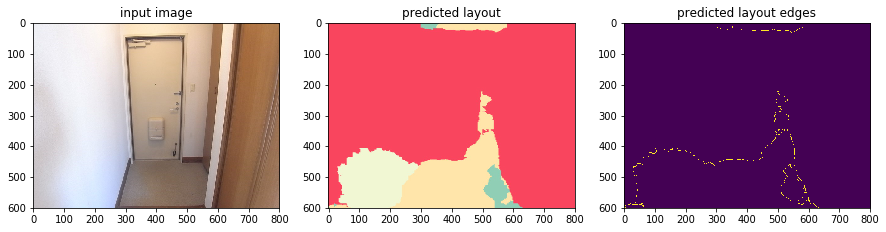

352.jpg


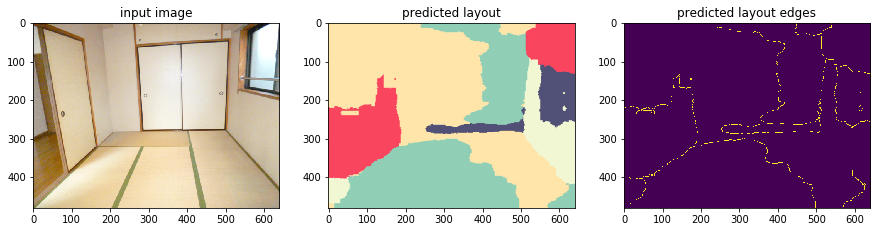

338.jpg


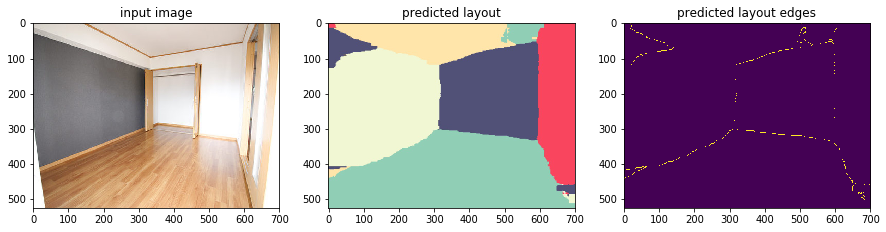

408.jpg


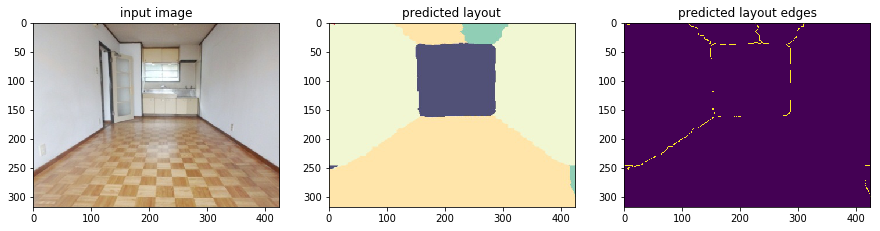

405.jpg


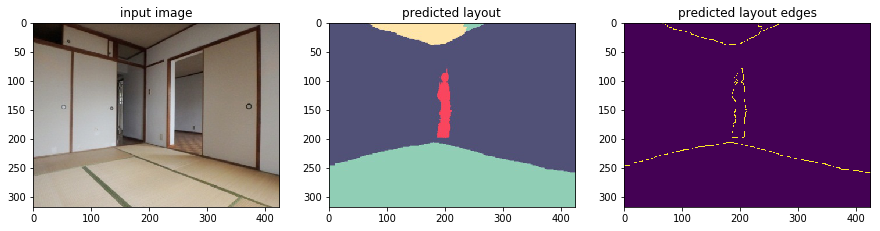

435.jpg


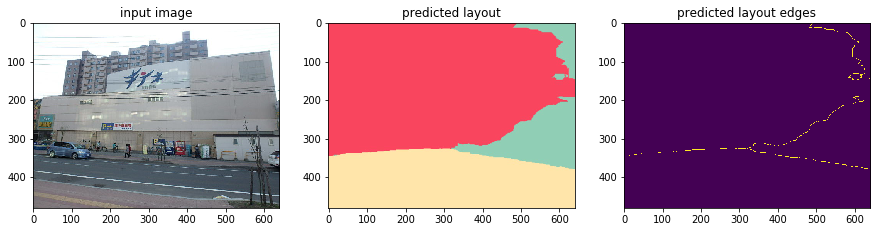

413.jpg


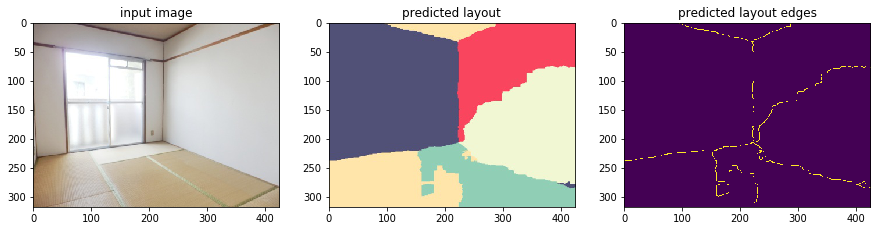

409.jpg


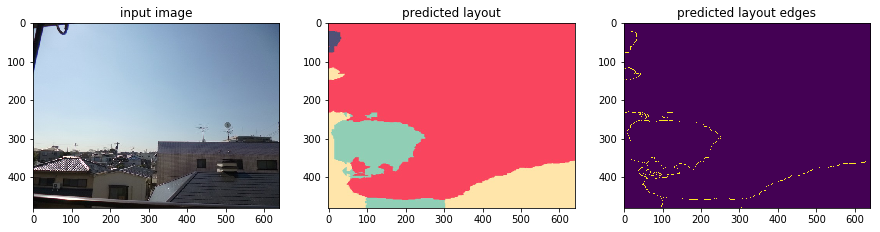

359.jpg


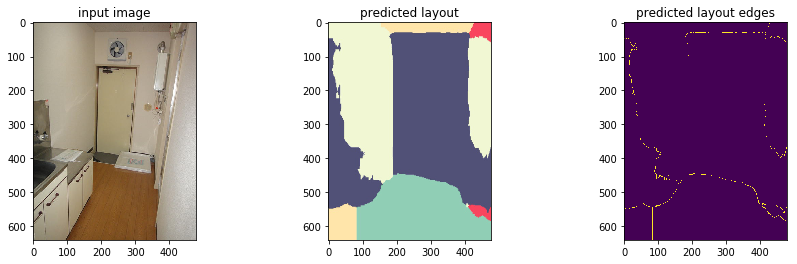

480.jpg


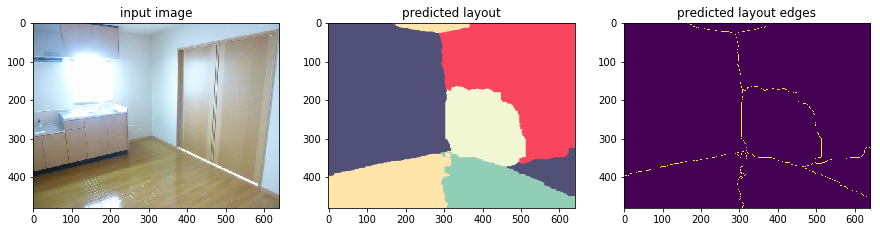

35.jpg


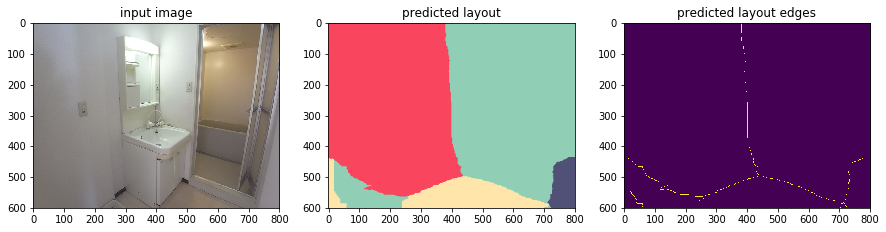

36.jpg


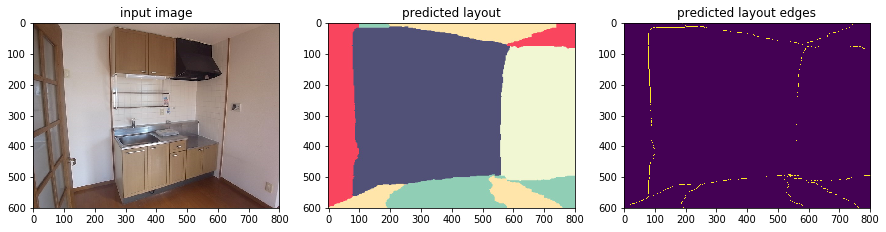

436.jpg


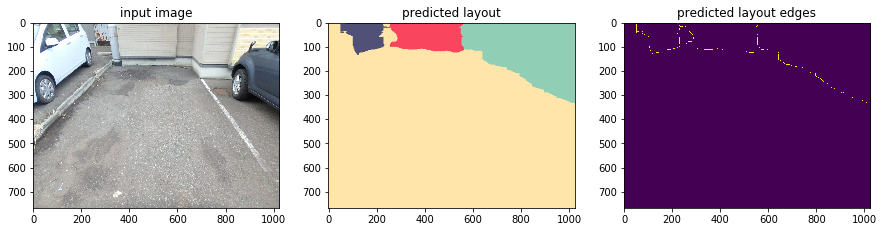

438.jpg


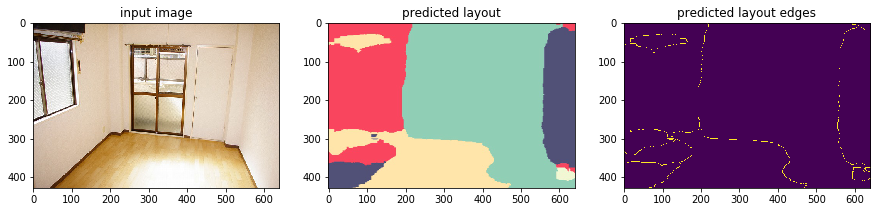

37.jpg


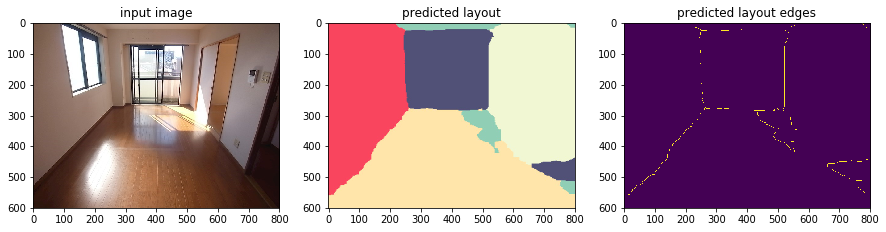

469.jpg


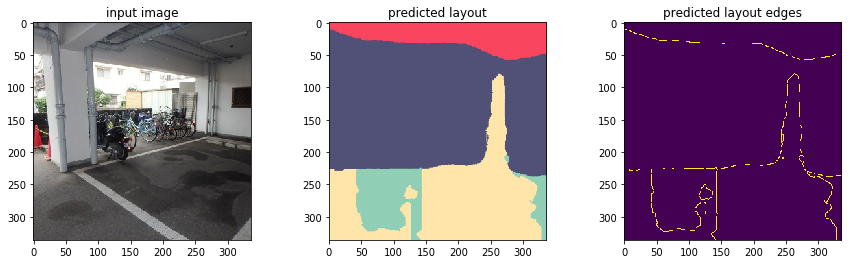

44.jpg


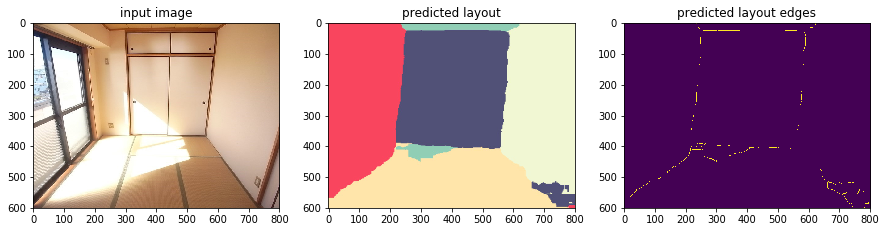

465.jpg


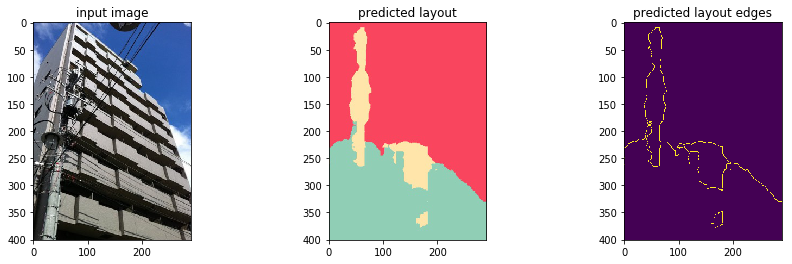

61.jpg


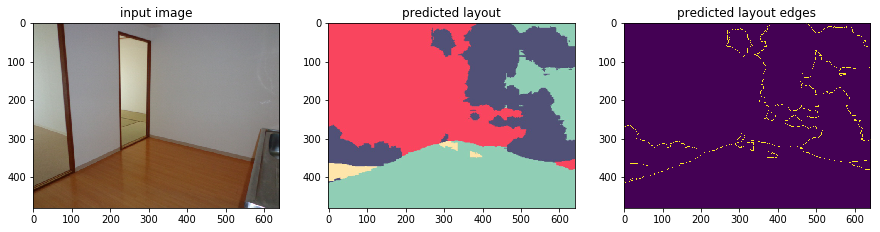

70.jpg


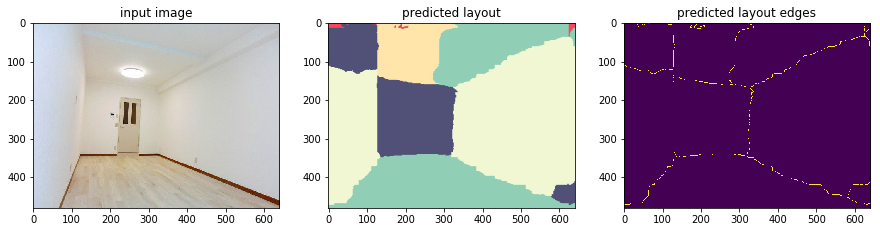

55.jpg


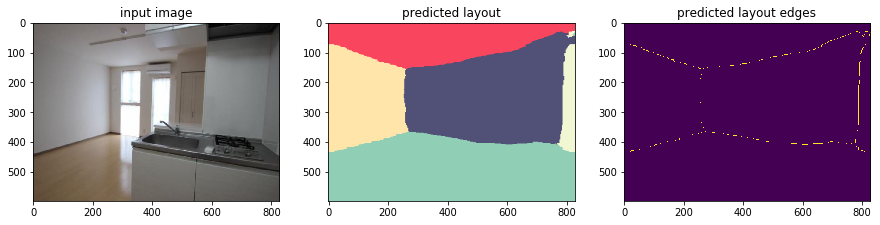

63.jpg


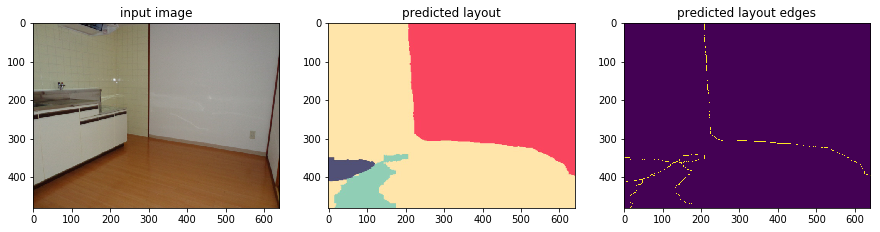

65.jpg


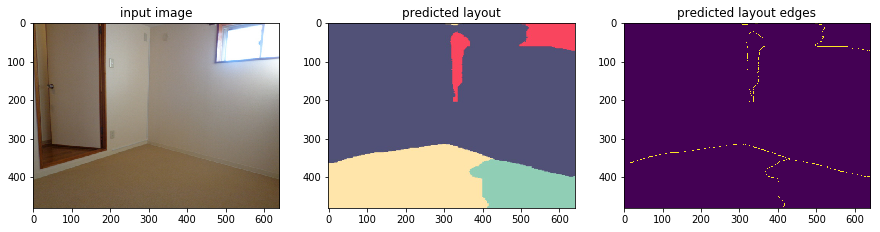

8.jpg


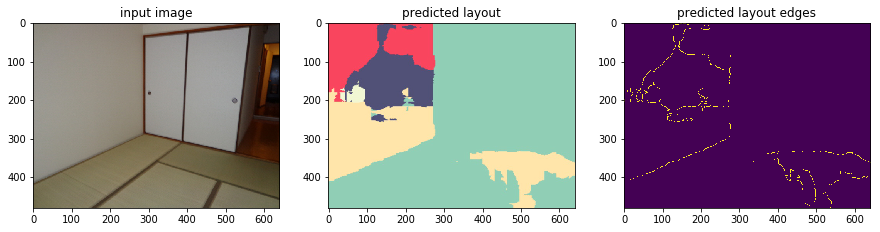

64.jpg


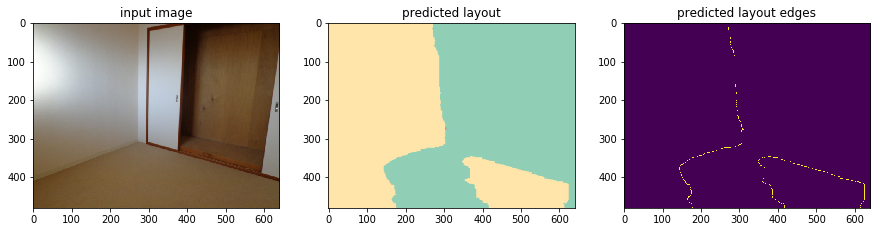

76.jpg


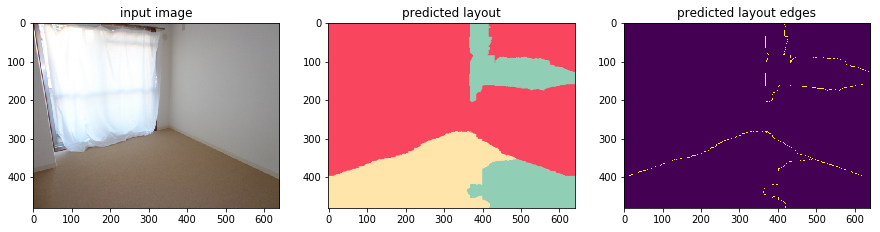

83.jpg


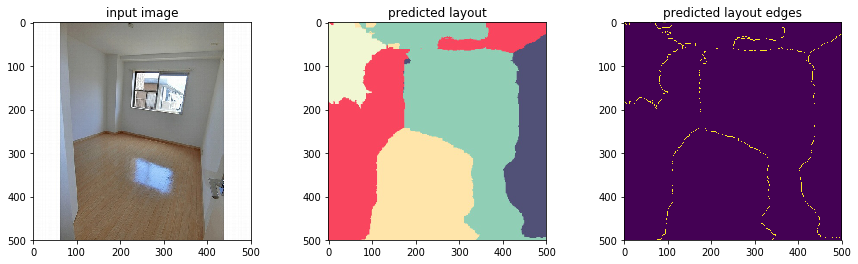

62.jpg


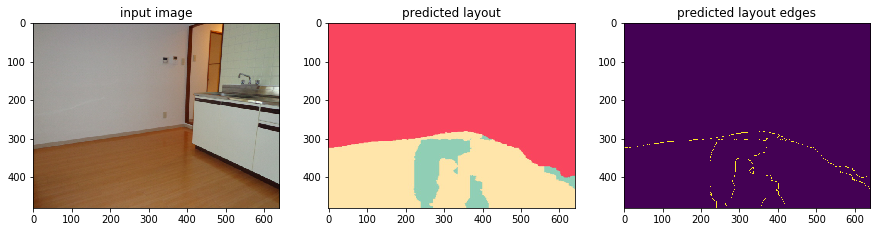

77.jpg


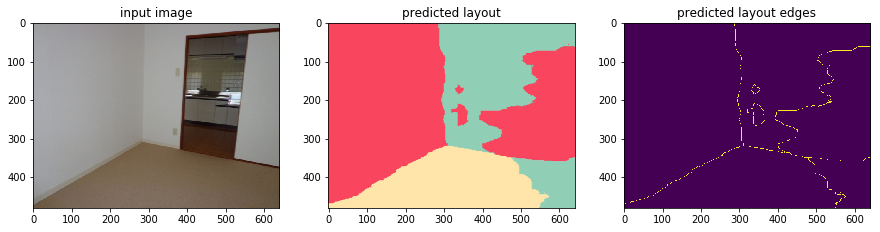

6.jpg


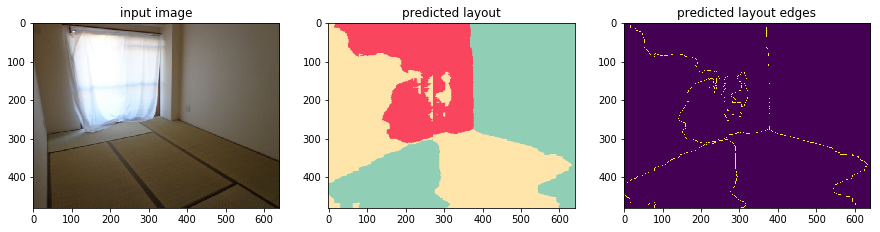

85.jpg


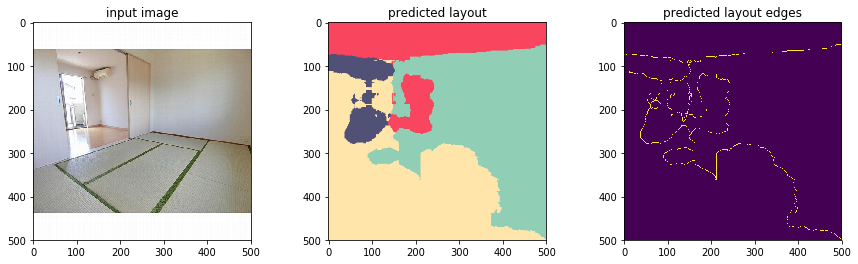

95.jpg


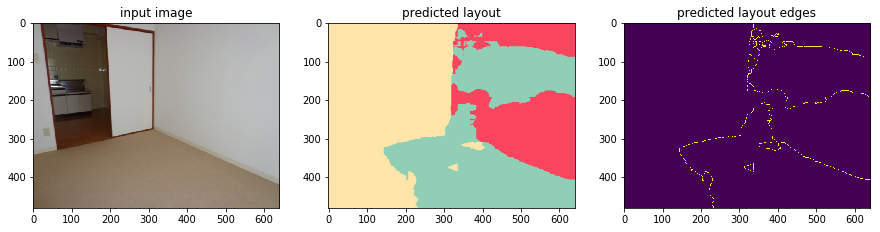

87.jpg


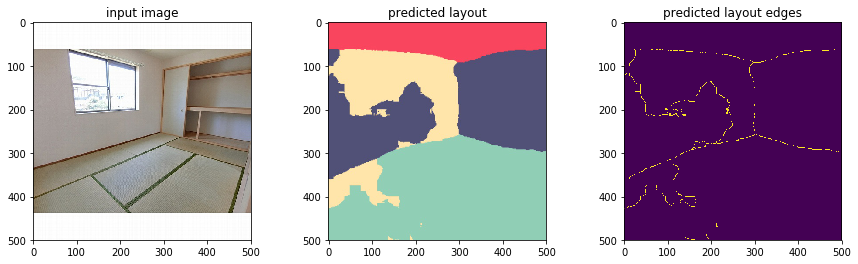

93.jpg


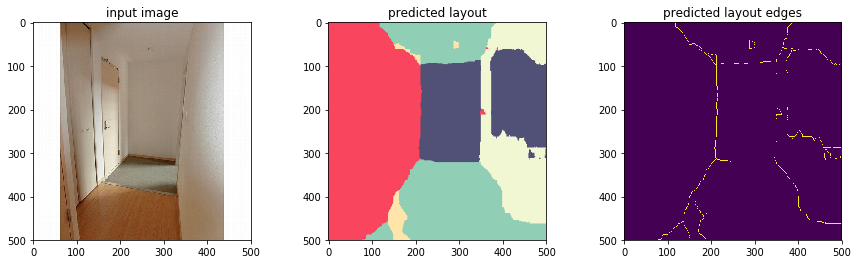

In [8]:
# homes
# --l2_factor 5  --edge_factor 50
test_input = Path('../data/homes/test_input')
test_output = Path('../data/homes/test_output')
show_imgs(test_input, test_output)

In [142]:
def post_process(img_no):
    img_path = str(Path('../data/homes/test_input') / '{}.jpg'.format(img_no))
    layout_path = str(Path('../data/homes/test_output') / '{}.jpg'.format(img_no))

    ori_img = cv2.imread(img_path)
    img = cv2.imread(layout_path)
    
    plt.figure(figsize=(15, 8))

    # layout予測
    ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
    plt.subplot(231)
    plt.imshow(ori_img)
    plt.title('input image')

    # layout予測
    plt.subplot(232)
    plt.imshow(img)
    plt.title('layout prediction')

    # 二値化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    blur = cv2.blur(gray, (3, 3)) # blur the image
    ret, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)
    thresh = np.invert(thresh)

    plt.subplot(233)
    plt.imshow(thresh)
    plt.title('binary + front filtering')

    # 輪郭線
    im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    plt.subplot(234)
    con_img = cv2.drawContours(img.copy(), contours, -1, (255,0,0), 10)
    plt.imshow(con_img)
    plt.title('contours')

    # 凸包
    hulls = []
    for c in contours:
        hulls.append(cv2.convexHull(c, False))
    idx = np.argmax([len(h) for h in hulls])
    plt.subplot(235)
    hull_img = cv2.drawContours(img.copy(), hulls, idx, (255,0,0), 10)
    hull_img = cv2.drawContours(hull_img, hulls[idx], -1, (0, 255, 0), 10)
    plt.imshow(hull_img)
    xy = hulls[idx].squeeze()
    plt.title('largest convex hull: {} points'.format(len(xy)))
    
    '''
    # 近似四辺形 (type 0)
    plt.subplot(236)
    plt.title('quad approximation')
    def get_nearest_p(anchor_p):
        return np.argmin([hypot(p[0] - anchor_p[0], p[1] - anchor_p[1]) for p in xy])
    idx_ul = get_nearest_p([0, 0])
    idx_bl = get_nearest_p([0, img.shape[0]])
    idx_ur = get_nearest_p([img.shape[1], 0])
    idx_br = get_nearest_p([img.shape[1], img.shape[0]])
    quad_approx = np.asarray([xy[idx_ul], xy[idx_bl], xy[idx_br], xy[idx_ur]])
    quad_img = cv2.drawContours(ori_img.copy(), [quad_approx], -1, (255,0,0), 10)
    quad_img = cv2.drawContours(quad_img, quad_approx.reshape(4, 1, 2), -1, (0, 255, 0), 10)
    plt.imshow(quad_img)
    
    '''
    # 近似多辺形 (type 5)
    plt.subplot(236)
    poly_approx = cv2.approxPolyDP(xy, 25, True)
    poly_img = cv2.drawContours(ori_img.copy(), [poly_approx], -1, (255,0,0), 10)
    poly_img = cv2.drawContours(poly_img, poly_approx, -1, (0, 255, 0), 10)
    plt.imshow(poly_img)
    plt.title('polygon approximation: {} points'.format(len(poly_approx)))


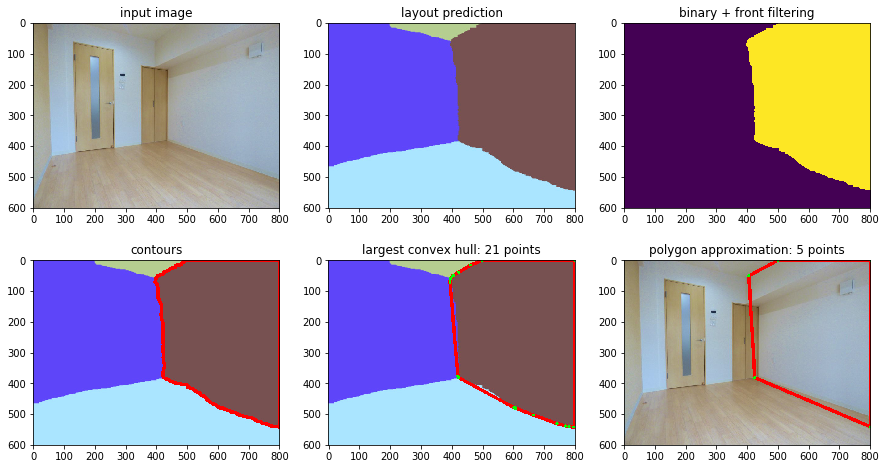

In [143]:
post_process(118)

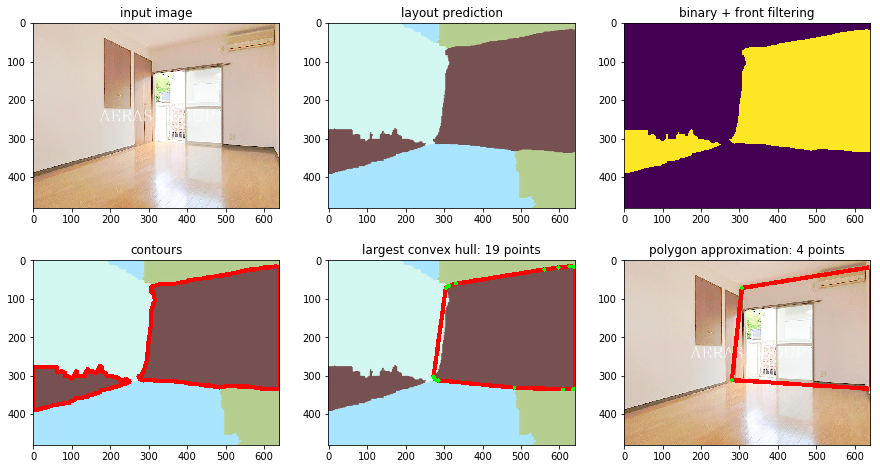

In [144]:
post_process(250)

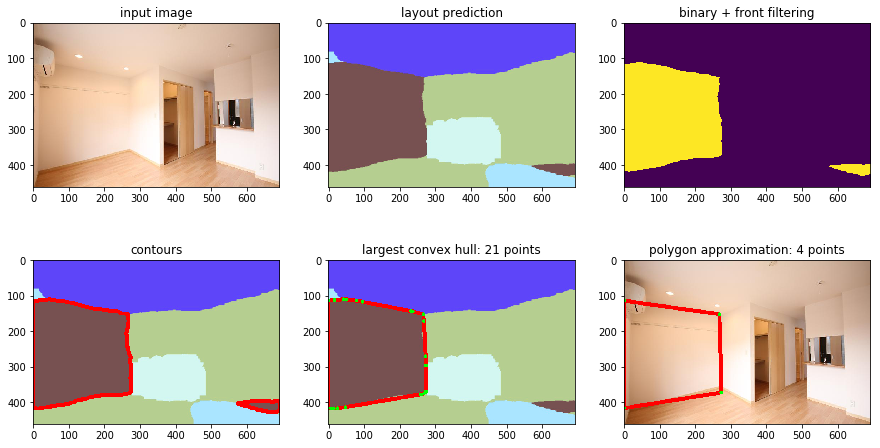

In [145]:
post_process(357)

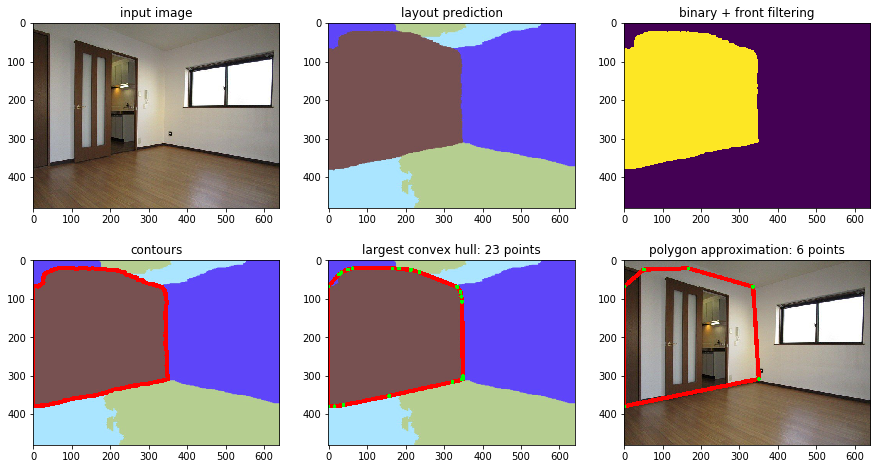

In [146]:
post_process(163)

13
